## Importing the neccessary libraries/packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # to easily display the plots

UsageError: unrecognized arguments: # to easily display the plots


## 1. Web Scraping
Web scraping is a process to extract large amounts of data from a website.

### Data extraction from the web using Python's Beautiful Soup module

In [2]:
from urllib.request import urlopen  # The urllib.request module is used to open URLs.
from bs4 import BeautifulSoup  # The Beautiful Soup package is used to extract data from html files.

In [3]:
# Specify the URL containing the dataset and pass it to urlopen() to get the html source code of the page
#url = "http://www.hubertiming.com/results/2017GPTR10K"
url = "https://www.hubertiming.com/results/2017GPTR"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml') # Creating a Beautiful Soup object from the html. The second argument 'lxml' is the html parser.
type(soup)

bs4.BeautifulSoup

In [ ]:
#FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. You need to install a parser library.
#!pip install lxml

## Let's extract some information from the website we are scraping

In [5]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [6]:
# Print out the text
text = soup.get_text()
print(soup.text)








Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!





















 2017 Intel Great Place to Run 5K
 Hillsboro Stadium, Hillsboro, OR 
 June 2nd, 2017


                            





 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





5K:


Finishers:
1458


Male:
771


Female:
687









 5K
 10K
 Summary







5K Results



Search:

Search
Division:

Men
Women
Masters Men
Masters Women

F 18-25
F 26-35
F 36-45
F 46-55
F 55+
F Under 18
M 18-25
M 26-35
M 36-45
M 46-55
M 55+
M Under 18
 Filter




Place
Bib
Name
Gender
City
State
Chip Time
Chip Pace
Gun Time




1
2320


                    DANIEL M HINCKLEY

                
M
HILLSBORO
OR
16:42
5:23
16:44


2
2335


                    KORY F GRAY

                
M
HILLSBORO
OR
17:34
5:40
17:35


3
1770


                    FILIP SCHMOLE

                
M
PORTLAND
OR

In [7]:
# To extract useful html tags within a webpage we can use the find_all() method of soup.
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="https://www.hubertiming.com/results/FB-f-Logo__blue_50.png"/></a>,
 <a class="small" id="bestFeatureEver" style="color:#007bff">Dark Mode</a>]

In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))  #To extract hyperlinks only use get("href") method

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR10K
/results/summary/2017GPTR
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [9]:
# To print out table rows only, pass the 'tr' argument in soup.find_all(). 
rows = soup.find_all('tr')
print(rows[:10])     # Print the first 10 rows for sanity check.

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>1458</td>
</tr>, <tr>
<td>Male:</td>
<td>771</td>
</tr>, <tr>
<td>Female:</td>
<td>687</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
</tr>, <tr data-bib="2320">
<td>1</td>
<td>2320</td>
<td>

                    DANIEL M HINCKLEY

                </td>
<td>M</td>
<td>HILLSBORO</td>
<td>OR</td>
<td>16:42</td>
<td>5:23</td>
<td>16:44</td>
</tr>, <tr data-bib="2335">
<td>2</td>
<td>2335</td>
<td>

                    KORY F GRAY

                </td>
<td>M</td>
<td>HILLSBORO</td>
<td>OR</td>
<td>17:34</td>
<td>5:40</td>
<td>17:35</td>
</tr>, <tr data-bib="1770">
<td>3</td>
<td>1770</td>
<td>

                    FILIP SCHMOLE

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>18:13</td>
<td>5:52</td>
<td>18:14</td>
</tr>, <tr data-bib="2584">
<td>4</td>
<td>2584</td>
<td>

       

### To get all table rows in a list and then convert that list into a dataframe. 

In [10]:
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td>Finishers:</td>, <td>1458</td>]
[<td>Male:</td>, <td>771</td>]
[<td>Female:</td>, <td>687</td>]
[]
[<td>1</td>, <td>2320</td>, <td>

                    DANIEL M HINCKLEY

                </td>, <td>M</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>16:42</td>, <td>5:23</td>, <td>16:44</td>]
[<td>2</td>, <td>2335</td>, <td>

                    KORY F GRAY

                </td>, <td>M</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>17:34</td>, <td>5:40</td>, <td>17:35</td>]
[<td>3</td>, <td>1770</td>, <td>

                    FILIP SCHMOLE

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>18:13</td>, <td>5:52</td>, <td>18:14</td>]
[<td>4</td>, <td>2584</td>, <td>

                    TRENTON C ROLLING

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>18:32</td>, <td>5:58</td>, <td>18:35</td>]
[<td>5</td>, <td>2688</td>, <td>

                    YEAN-AN LIAO

                </td>, <td>M</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>19:12</td>, <

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>31:53</td>, <td>10:17</td>, <td>33:21</td>]
[<td>453</td>, <td>1515</td>, <td>

                    SANG PHILL PARK

                </td>, <td>M</td>, <td>NOT SPECIFIED</td>, <td>OR</td>, <td>31:53</td>, <td>10:17</td>, <td>32:52</td>]
[<td>454</td>, <td>1932</td>, <td>

                    THOR T MITCHELL

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>31:54</td>, <td>10:17</td>, <td>33:35</td>]
[<td>455</td>, <td>3017</td>, <td>

                    SACHINI KARUNASIRI

                </td>, <td>F</td>, <td>BEAVERTON</td>, <td>OR</td>, <td>31:54</td>, <td>10:17</td>, <td>32:57</td>]
[<td>456</td>, <td>3039</td>, <td>

                    KERRY A SCHOENEMAN

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>31:55</td>, <td>10:17</td>, <td>34:30</td>]
[<td>457</td>, <td>2697</td>, <td>

                    ABHAY TAVARAGIRI

                </td>, <td>M</td>, <td>HILLSBOR

[<td>856</td>, <td>2813</td>, <td>

                    AMY HARPER

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>39:34</td>, <td>12:45</td>, <td>42:31</td>]
[<td>857</td>, <td>2192</td>, <td>

                    BINDOO MADANI

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>39:34</td>, <td>12:46</td>, <td>40:15</td>]
[<td>858</td>, <td>2748</td>, <td>

                    ZIVIT KATZ-TSAMERET

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>39:37</td>, <td>12:46</td>, <td>40:54</td>]
[<td>859</td>, <td>1810</td>, <td>

                    NANCY M NGUYEN

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>39:37</td>, <td>12:47</td>, <td>41:46</td>]
[<td>860</td>, <td>1171</td>, <td>

                    ANDREA AVILA

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>39:38</td>, <td>12:47</td>, <td>41:46</td>]
[<td>861</td>, <td>1767</td>, <td>

                    KHANG T NGU

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>54:44</td>, <td>17:39</td>, <td>57:39</td>]
[<td>1279</td>, <td>2954</td>, <td>

                    NICOLE OTA

                </td>, <td>F</td>, <td>TIGARD</td>, <td>OR</td>, <td>54:52</td>, <td>17:42</td>, <td>58:03</td>]
[<td>1280</td>, <td>2927</td>, <td>

                    SCOTT OTA

                </td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>54:54</td>, <td>17:42</td>, <td>58:04</td>]
[<td>1281</td>, <td>2495</td>, <td>

                    RICK M NELSON

                </td>, <td>M</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>54:57</td>, <td>17:43</td>, <td>56:49</td>]
[<td>1282</td>, <td>3079</td>, <td>

                    RAJEEV KAPUR

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>54:57</td>, <td>17:43</td>, <td>55:52</td>]
[<td>1283</td>, <td>3080</td>, <td>

                    RESHMA LAL

                </td>, <td>F</td>, <td>PORTLAND</td>, <td>OR</td>, <td>54:57</t

bs4.element.ResultSet

### We can remove the html tags using Beautiful Soup
Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [11]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[1458, 1400, 

                    SUMALATHA PURMA

                , F, PORTLAND, OR, 1:48:13, 34:54, 1:48:13]


## (Or) We remove the html tags using regular expressions

In [12]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[1458, 1400, 

                    SUMALATHA PURMA

                , F, PORTLAND, OR, 1:48:13, 34:54, 1:48:13]


str

### To convert the list into a dataframe

In [13]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 1458]"
2,"[Male:, 771]"
3,"[Female:, 687]"
4,[]
5,"[1, 2320, \r\n\r\n DANIEL M..."
6,"[2, 2335, \r\n\r\n KORY F G..."
7,"[3, 1770, \r\n\r\n FILIP SC..."
8,"[4, 2584, \r\n\r\n TRENTON ..."
9,"[5, 2688, \r\n\r\n YEAN-AN ..."


# 2. Data Manipulation and Cleaning

### Converting the single-column dataframe in to meaningful dataframe (multi-column)
We should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.

In [14]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,1458],None,None,None,None,None,None,None
2,[Male:,771],None,None,None,None,None,None,None
3,[Female:,687],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,[2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,[3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,[4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]
9,[5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18]


### To remove the opening square bracket on column "0", we can use the strip() method

In [15]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,1458],None,None,None,None,None,None,None
2,Male:,771],None,None,None,None,None,None,None
3,Female:,687],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18]


### The table is missing table headers. We can use the find_all() method to get the table headers.

In [16]:
col_labels = soup.find_all('th')

In [17]:
print(col_labels)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Chip Time</th>, <th>Chip Pace</th>, <th>Gun Time</th>]


### Extracting text in between html tags for table headers using the Beautiful Soup

In [18]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time]']


### Converting the list of headers into a pandas dataframe

In [19]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


### Spliting column "0" into multiple columns at the comma position

In [20]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]


### Concatenating the two dataframe into one using the concat() method

In [21]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,],None,None,None,None,None,None,None,None
1,Finishers:,1458],None,None,None,None,None,None,None
2,Male:,771],None,None,None,None,None,None,None
3,Female:,687],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]


# Asigning the first row of the table as the table header

In [26]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head(15)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,],None,None,None,None,None,None,None,None
1,Finishers:,1458],None,None,None,None,None,None,None
2,Male:,771],None,None,None,None,None,None,None
3,Female:,687],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]


### Getting an overview of the data

In [23]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1462
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      1464 non-null   object
 1    Bib        1462 non-null   object
 2    Name       1459 non-null   object
 3    Gender     1459 non-null   object
 4    City       1459 non-null   object
 5    State      1459 non-null   object
 6    Chip Time  1459 non-null   object
 7    Chip Pace  1459 non-null   object
 8    Gun Time]  1459 non-null   object
dtypes: object(9)
memory usage: 114.4+ KB


(1464, 9)

### Droping all rows with any missing values

In [24]:
df6 = df5.dropna(axis=0, how='any')

In [25]:
df6.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18]
10,6,1576,\r\n\r\n JORGE1 LOPEZ\r\n\...,M,PORTLAND,OR,19:19,6:14,19:20]
11,7,1479,\r\n\r\n SCOTT E HAMPSHIRE...,M,HILLSBORO,OR,19:27,6:16,19:29]
12,8,895,\r\n\r\n KEVIN CANADA\r\n\...,M,BEAVERTON,OR,19:53,6:24,20:02]
13,9,2631,\r\n\r\n SCOTT GERWIG\r\n\...,M,PORTLAND,OR,19:57,6:26,19:59]


In [30]:
df6.shape

(1459, 9)

### Dropping 1st row as it is replicated the header

In [27]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time]
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18]


### More Data cleaning: Renaming the '[Place' and ' Gun Time]' columns 

In [28]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Gun Time]': 'Gun Time'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44]
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35]
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14]
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35]
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18]


### Removing the closing bracket for cells in the "Gun Time" column

In [32]:
df7['Gun Time'] = df7['Gun Time'].str.strip(']')
df7.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18
10,6,1576,\r\n\r\n JORGE1 LOPEZ\r\n\...,M,PORTLAND,OR,19:19,6:14,19:20
11,7,1479,\r\n\r\n SCOTT E HAMPSHIRE...,M,HILLSBORO,OR,19:27,6:16,19:29
12,8,895,\r\n\r\n KEVIN CANADA\r\n\...,M,BEAVERTON,OR,19:53,6:24,20:02
13,9,2631,\r\n\r\n SCOTT GERWIG\r\n\...,M,PORTLAND,OR,19:57,6:26,19:59
14,10,2431,\r\n\r\n NICOLAUS L ROCK\r...,M,HILLSBORO,OR,20:00,6:27,20:01


# 3. Data Analysis and Visualization

## 3.A. What is the average finish time (in minutes) for the runners ?

In [33]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    if len(i)<8:
        i='0:'+i
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
print(time_mins)

[16.7, 17.566666666666666, 18.216666666666665, 18.533333333333335, 19.2, 19.316666666666666, 19.45, 19.883333333333333, 19.95, 20.0, 20.3, 20.516666666666666, 20.6, 20.7, 20.75, 20.766666666666666, 20.816666666666666, 20.916666666666668, 20.966666666666665, 21.033333333333335, 21.25, 21.533333333333335, 21.733333333333334, 21.75, 21.8, 22.05, 22.1, 22.133333333333333, 22.15, 22.2, 22.35, 22.4, 22.416666666666668, 22.516666666666666, 22.6, 22.683333333333334, 22.75, 22.8, 23.0, 23.116666666666667, 23.2, 23.216666666666665, 23.233333333333334, 23.316666666666666, 23.383333333333333, 23.45, 23.45, 23.45, 23.466666666666665, 23.5, 23.5, 23.516666666666666, 23.566666666666666, 23.583333333333332, 23.616666666666667, 23.65, 23.666666666666668, 23.666666666666668, 23.683333333333334, 23.716666666666665, 23.733333333333334, 23.783333333333335, 23.783333333333335, 23.8, 23.85, 23.883333333333333, 24.0, 24.0, 24.0, 24.0, 24.0, 24.083333333333332, 24.133333333333333, 24.133333333333333, 24.183333

### Converting the list back into a dataframe and make a new column ("Runner_mins") for runner chip times expressed in just minutes

In [34]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Runner_mins
5,1,2320,\r\n\r\n DANIEL M HINCKLEY...,M,HILLSBORO,OR,16:42,5:23,16:44,16.700000
6,2,2335,\r\n\r\n KORY F GRAY\r\n\r...,M,HILLSBORO,OR,17:34,5:40,17:35,17.566667
7,3,1770,\r\n\r\n FILIP SCHMOLE\r\n...,M,PORTLAND,OR,18:13,5:52,18:14,18.216667
8,4,2584,\r\n\r\n TRENTON C ROLLING...,M,PORTLAND,OR,18:32,5:58,18:35,18.533333
9,5,2688,\r\n\r\n YEAN-AN LIAO\r\n\...,M,HILLSBORO,OR,19:12,6:11,19:18,19.200000


### Statistics for numeric columns

In [35]:
df7.describe(include=[np.number])

,Runner_mins
count,1458.000000
mean,39.230476
std,11.948054
min,16.700000
25%,30.120833
50%,36.758333
75%,46.829167
max,108.216667


### A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers).

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

([<matplotlib.axis.XTick at 0x21254908a90>], [Text(0, 0, 'Runners')])

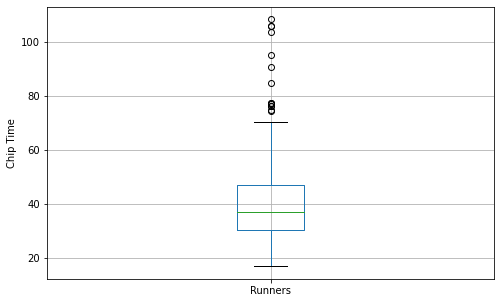

In [37]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

# 3.B. Did the runners' finish times follow a normal distribution?

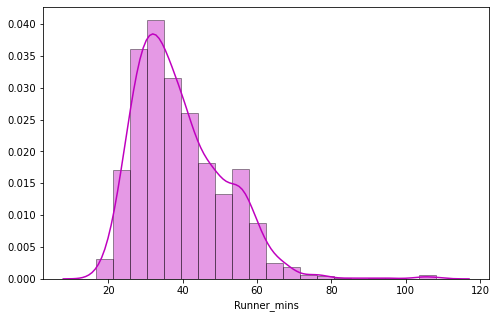

In [38]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=20, hist_kws={'edgecolor':'black'})
plt.show()

# 3.C. Are there any performance differences between males and females of various age groups?

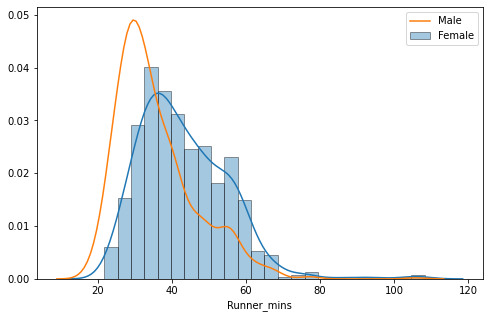

In [39]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

## We can use the groupby() method to compute summary statistics for males and females separately as shown below.

In [40]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                    \
              count       mean        std   min        25%        50%   
 Gender                                                                 
 F            687.0  43.238913  11.943987  21.8  34.458333  41.300000   
 M            771.0  35.658755  10.766549  16.7  28.225000  33.066667   

                                
               75%         max  
 Gender                         
 F       50.633333  108.216667  
 M       40.608333  105.666667  


### Below is a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

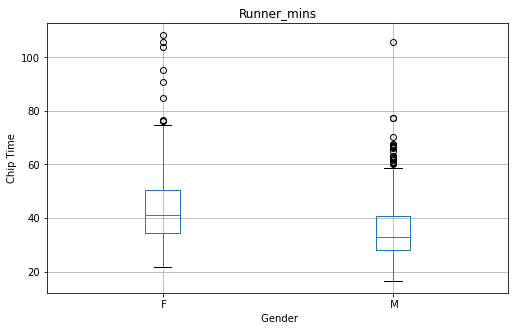

In [41]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")